SED690

SIT@KMUTT

Mar. 2025


Credit and source:

https://github.com/roboflow/notebooks/blob/main/notebooks/train-yolov8-object-detection-on-custom-dataset.ipynb

We use our own datasets (e.g., eggs) to train and validate to build our custom model (e.g., for detecting eggs). After finishing the training and modeling we will save the model and use it later for a detection of eggs.

Similarly, do the same things when we try to train the other datasets, e.g., toothbrushes for being used in classifications.


In [1]:
# Check the current working directory.

import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
# Install YOLOv8
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q
!pip install -U ultralytics  # with a latest update

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.90 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 40.7/112.6 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [4]:
# Make a directory for datasets

!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


In [5]:
# We will upload our zipped dataset (labelled from Roboflow or LabelImg) to this directory.

from google.colab import files

# Upload the zipped folder
uploaded = files.upload()


Saving SED690_eggs_detection.v1i.yolov8.zip to SED690_eggs_detection.v1i.yolov8.zip


In [6]:
# Unzip the datasets (train, validaate, and test, etc.)

import zipfile

# Specify the name of the uploaded zip file
zip_file_name = '/content/datasets/SED690_eggs_detection.v1i.yolov8.zip'

# Unzip the file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets/eggs')

print("Folder extracted successfully.")

Folder extracted successfully.


In [7]:
from logging import currentframe
%cd {HOME}/datasets/eggs

# check the current working directory

HOME = os.getcwd()
print(HOME)


/content/datasets/eggs
/content/datasets/eggs


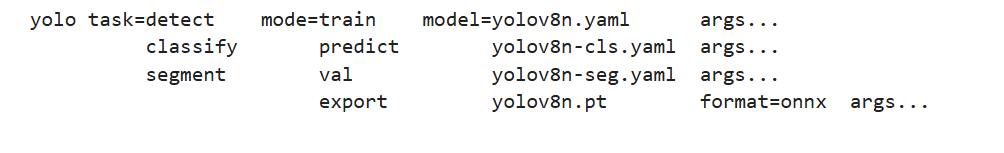

Train the model with our own dataset.

*** Change the task accordingly when you want to classify, segment or of course detect. ***

This command is useful when:

- You want to train a model from scratch or fine-tune a pretrained model on your custom dataset.
- You want to monitor the training process and validate the model periodically.
- You need to generate new model weights for deployment or further evaluation.

In [8]:
%cd {HOME}
HOME = os.getcwd()
print(HOME)


# This command is used to train available pre-trained YOLOv8 model on our dataset.
# It involves updating the model's weights based on the training data and validating
# the model periodically (after each epoch) during training.

# Adjust 'epoch' number as per your requirements.


!yolo task=detect mode=train model=yolov8s.pt data={HOME}/data.yaml epochs=5 imgsz=200 plots=True


# Afterwards, the 'best.pt' model is saved at ../runs/detect/train/weights/best.pt.
# Its weights is from the best performance of the model during training (of any epoch).

# Note that the 'last.pt' is the model with weights after the last epoch.

# We, however, will use the 'best.pt' model.


/content/datasets/eggs
/content/datasets/eggs
100% 21.5M/21.5M [00:00<00:00, 367MB/s]
Ultralytics 8.3.90 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/eggs/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=200, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, sav

/content/datasets/eggs


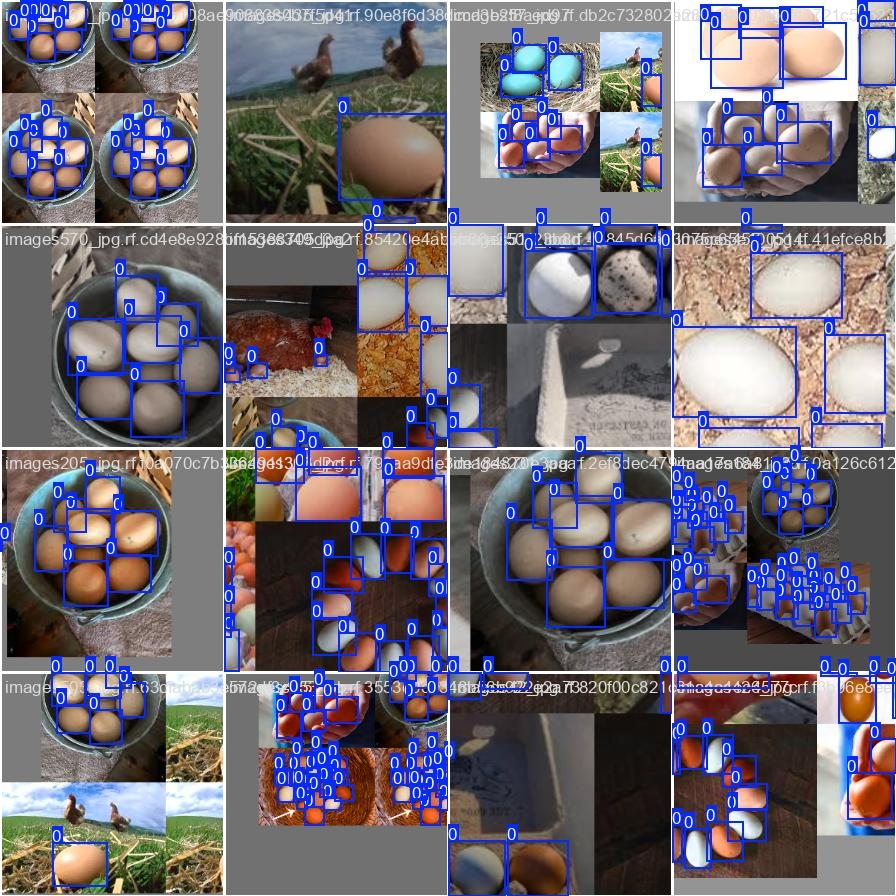

In [9]:
# Let's see some outputs of our trained models.

%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/train_batch0.jpg', width=600)


/content/datasets/eggs


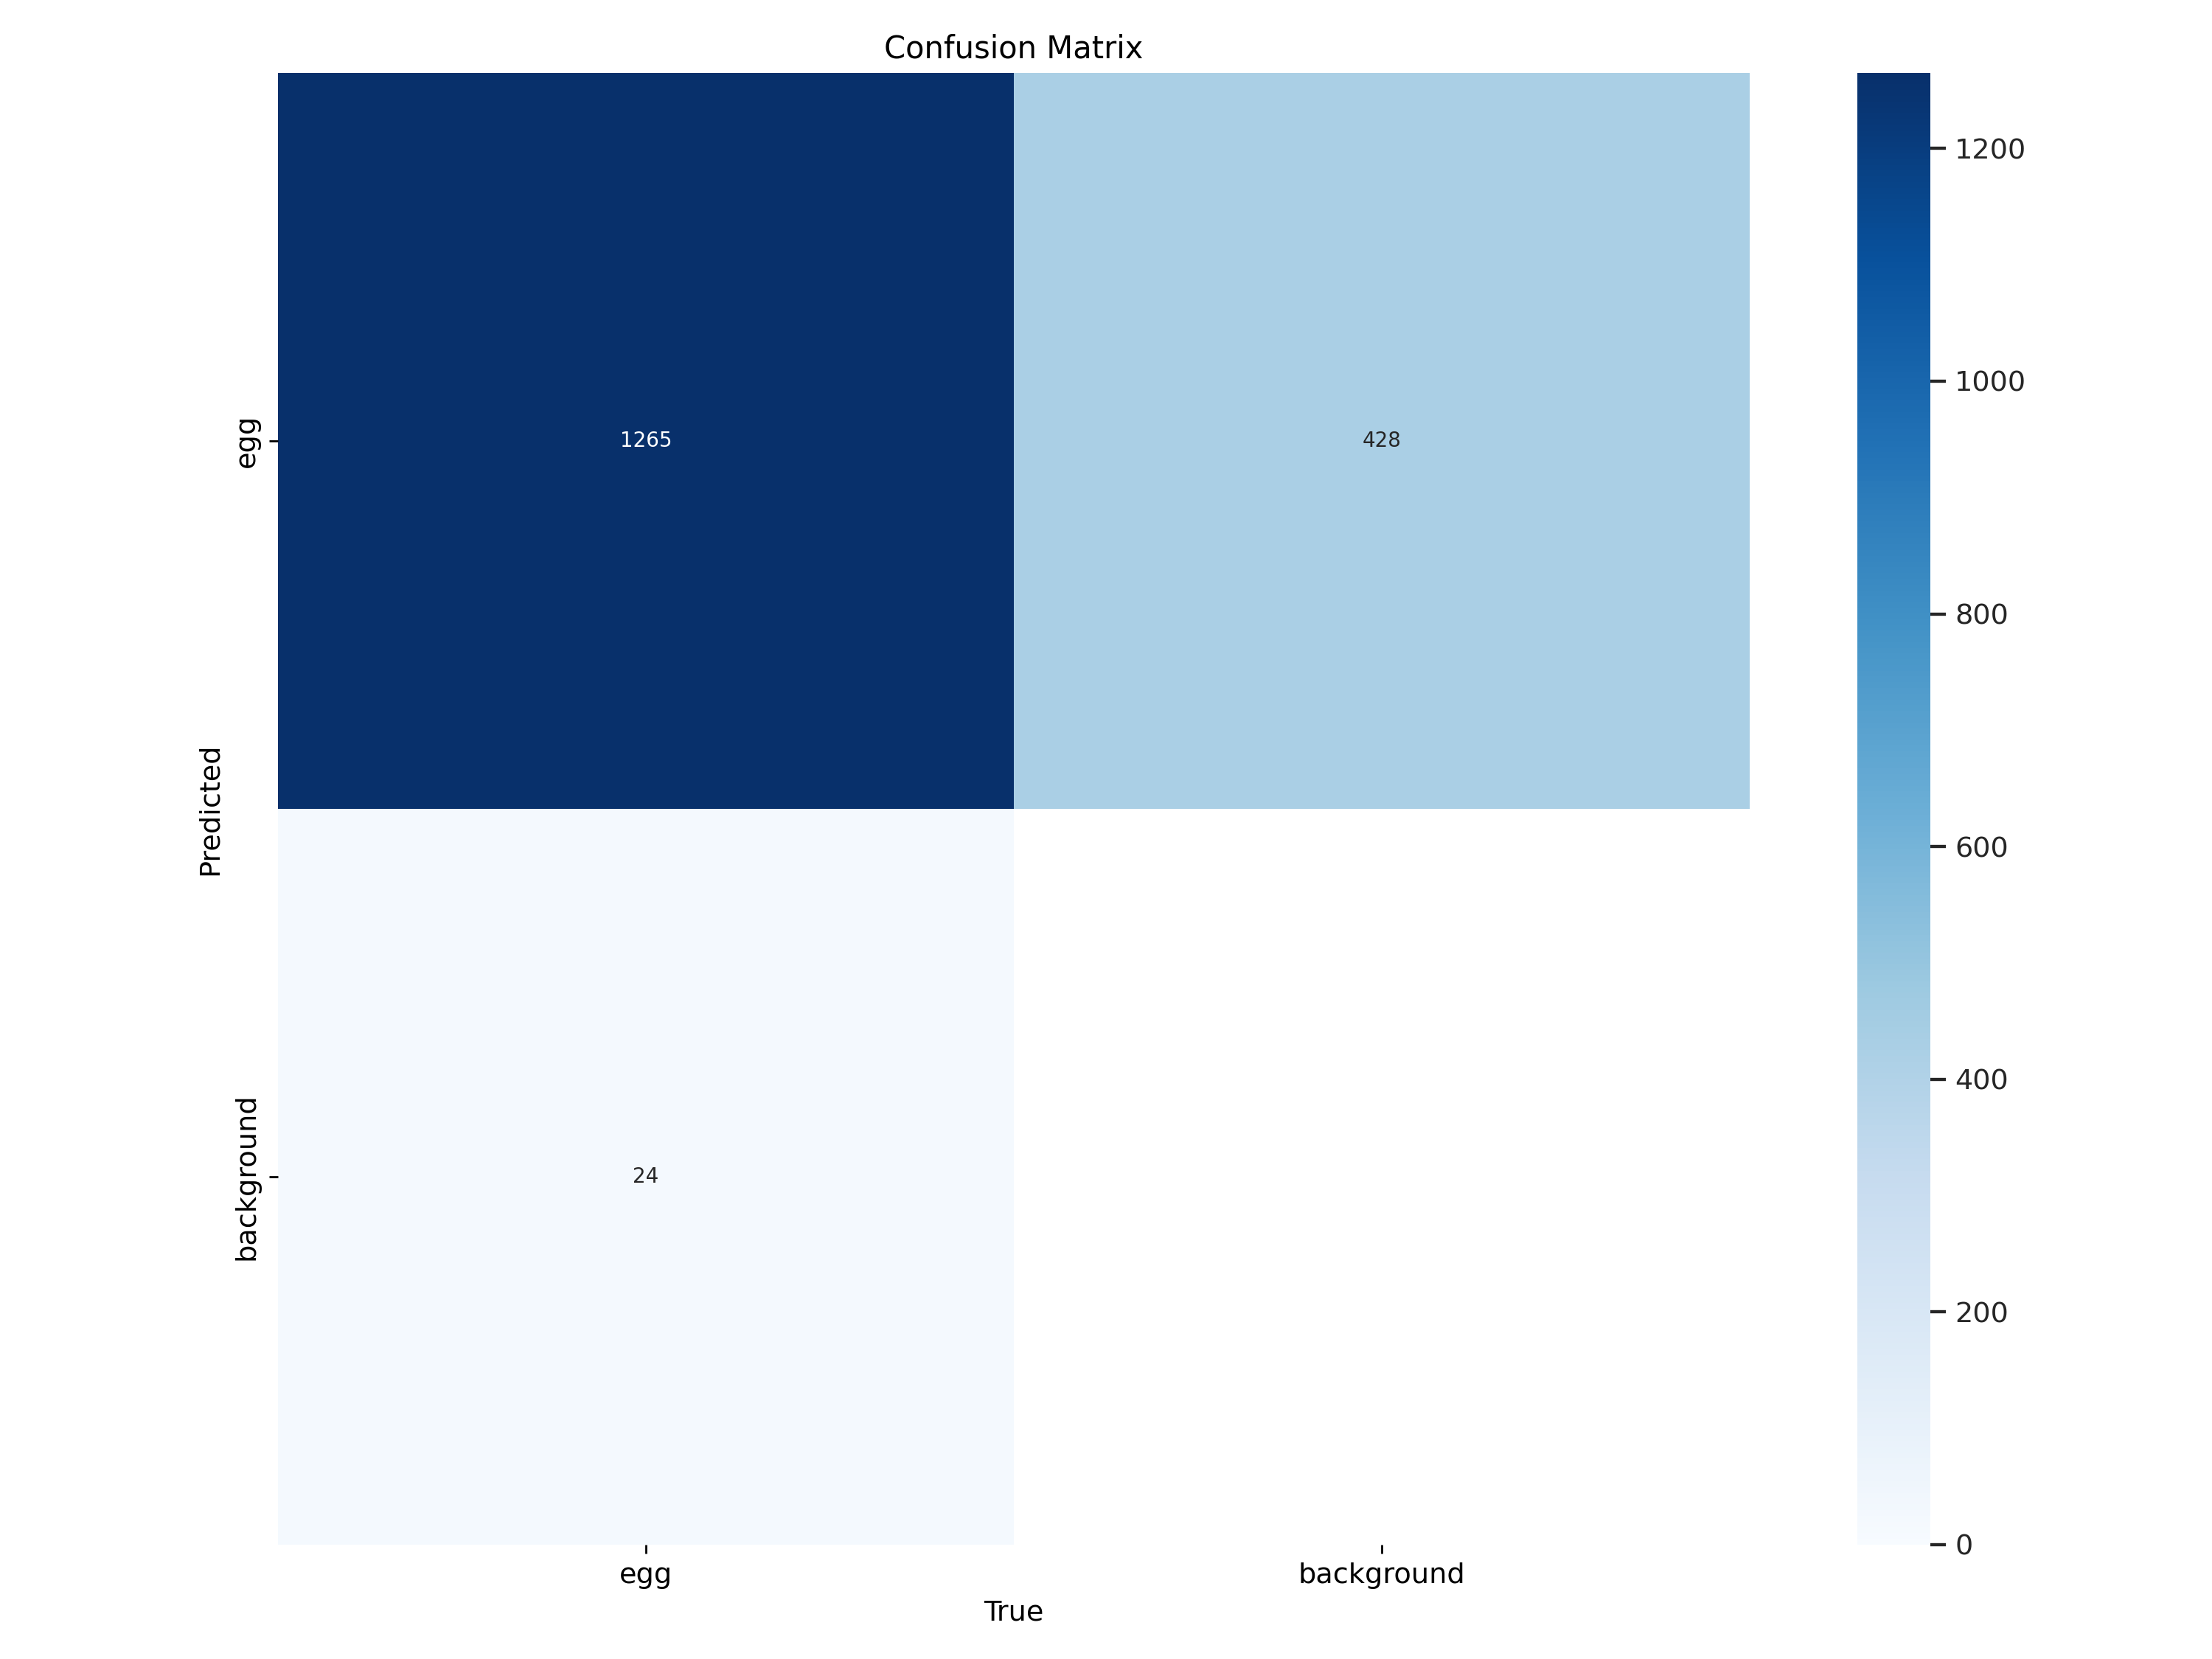

In [18]:
# See the confusion matrix.

%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content/datasets/eggs


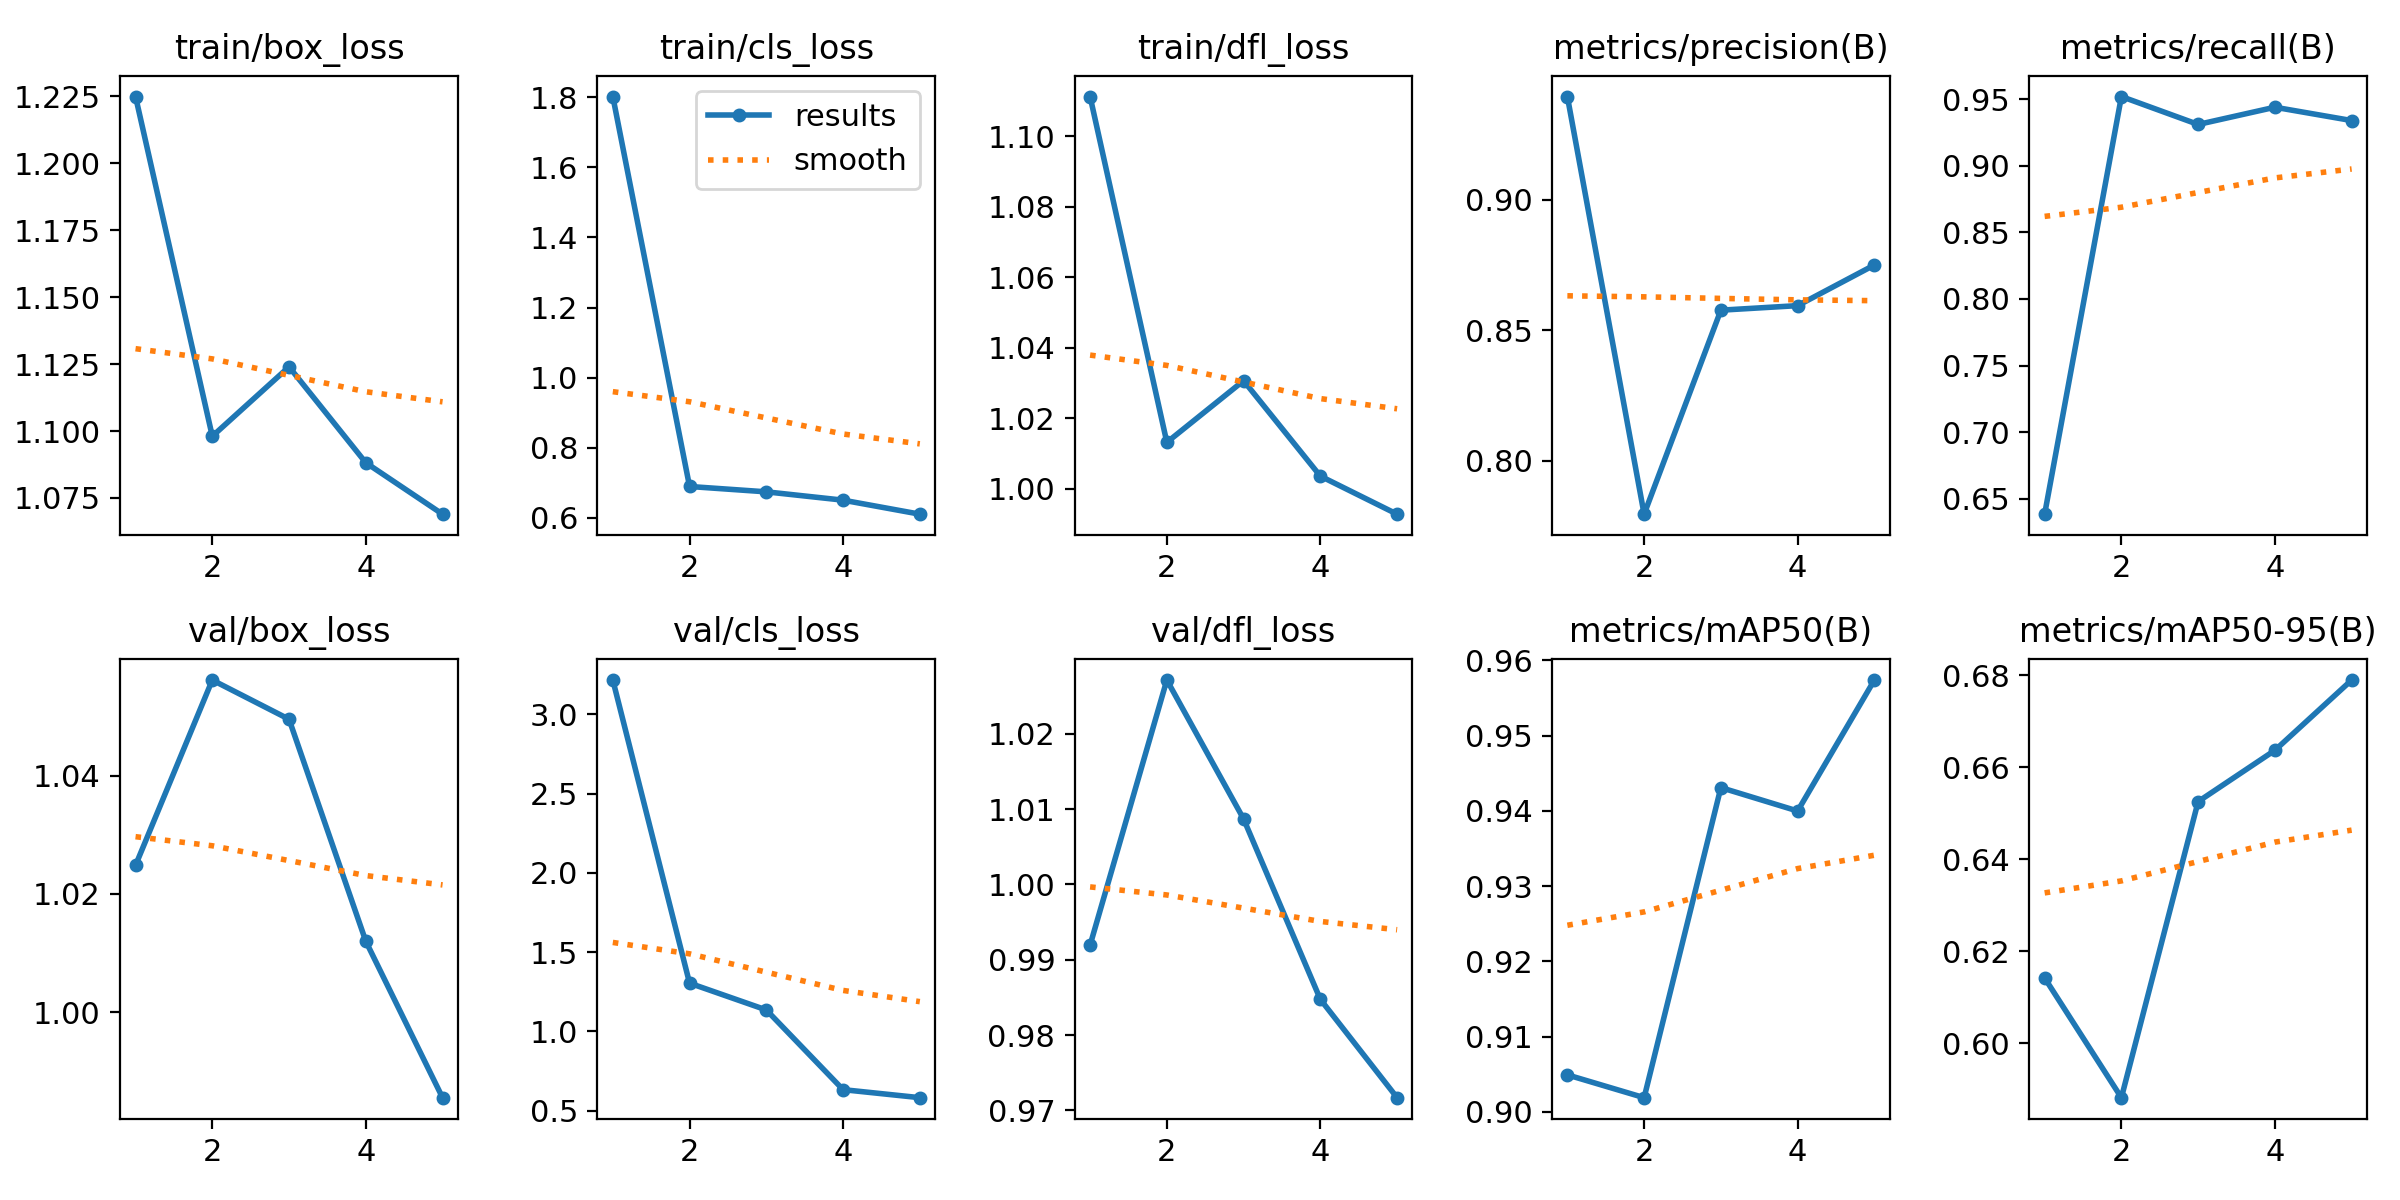

In [17]:
# See some metrics.

%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=900)

**Now we are ready to use our 'best.pt' model.**

Look for it at: ../runs/detect/train/weights/best.pt.

Next, you can skip the parts below and move to another example program to deploy and use our trained model.




+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

**Now, after haveing our own 'best.pt' model...**

Let's try to make some inferences (predicting) with our custom best model

In [19]:
# Notice below the use of our new trained 'best.pt' model.
# Let's hope that it works!

%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={HOME}/test/images save=True


/content/datasets/eggs
Ultralytics 8.3.90 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs

image 1/106 /content/datasets/eggs/test/images/03-14-18-Egg-Basket-Orig-scaled_jpg.rf.a41d4a6adfa412f9dee1c3f9b9bd6a93.jpg: 192x224 26 eggs, 38.4ms
image 2/106 /content/datasets/eggs/test/images/3958761_jpg.rf.781858d2d5620e983850985b0fcfa151.jpg: 160x224 1 egg, 38.8ms
image 3/106 /content/datasets/eggs/test/images/642aab2cdc578b719d7bf498-aulock-10-pack-thickened-coco-coir-liner_jpg.rf.84566a5e843012a0ec603eca792378f9.jpg: 224x224 6 eggs, 8.5ms
image 4/106 /content/datasets/eggs/test/images/81SU1uBb6gL-_AC_UF8941000_QL80__jpg.rf.c185f56bb7f30def95d842353c68d8c6.jpg: 224x224 2 eggs, 7.3ms
image 5/106 /content/datasets/eggs/test/images/AdobeStock_77981638_jpeg.rf.bd653e394bced3a65e3448d935134d08.jpg: 160x224 7 eggs, 7.8ms
image 6/106 /content/datasets/eggs/test/images/Chick-hatched-in-incubator-_jpg.rf

**Extra:**

Validate our trained best model with just the validation set.

This is useful when:

- You want to evaluate the performance of a previously trained model on the validation set.
- You want to compare the performance of different models or checkpoints.
- You do not need to train the model further.


In [20]:
%cd {HOME}

# This command is used to evaluate (validate) a pre-trained model on a dataset. It does not involve training; instead,
# it calculates performance metrics (e.g., mAP, precision, recall) for the given model using the validation set

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={HOME}/data.yaml


/content/datasets/eggs
Ultralytics 8.3.90 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/eggs/valid/labels.cache... 167 images, 0 backgrounds, 0 corrupt: 100% 167/167 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 11/11 [00:03<00:00,  3.55it/s]
                   all        167       1289      0.871      0.941      0.957      0.679
Speed: 0.6ms preprocess, 6.2ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


/content/datasets/eggs


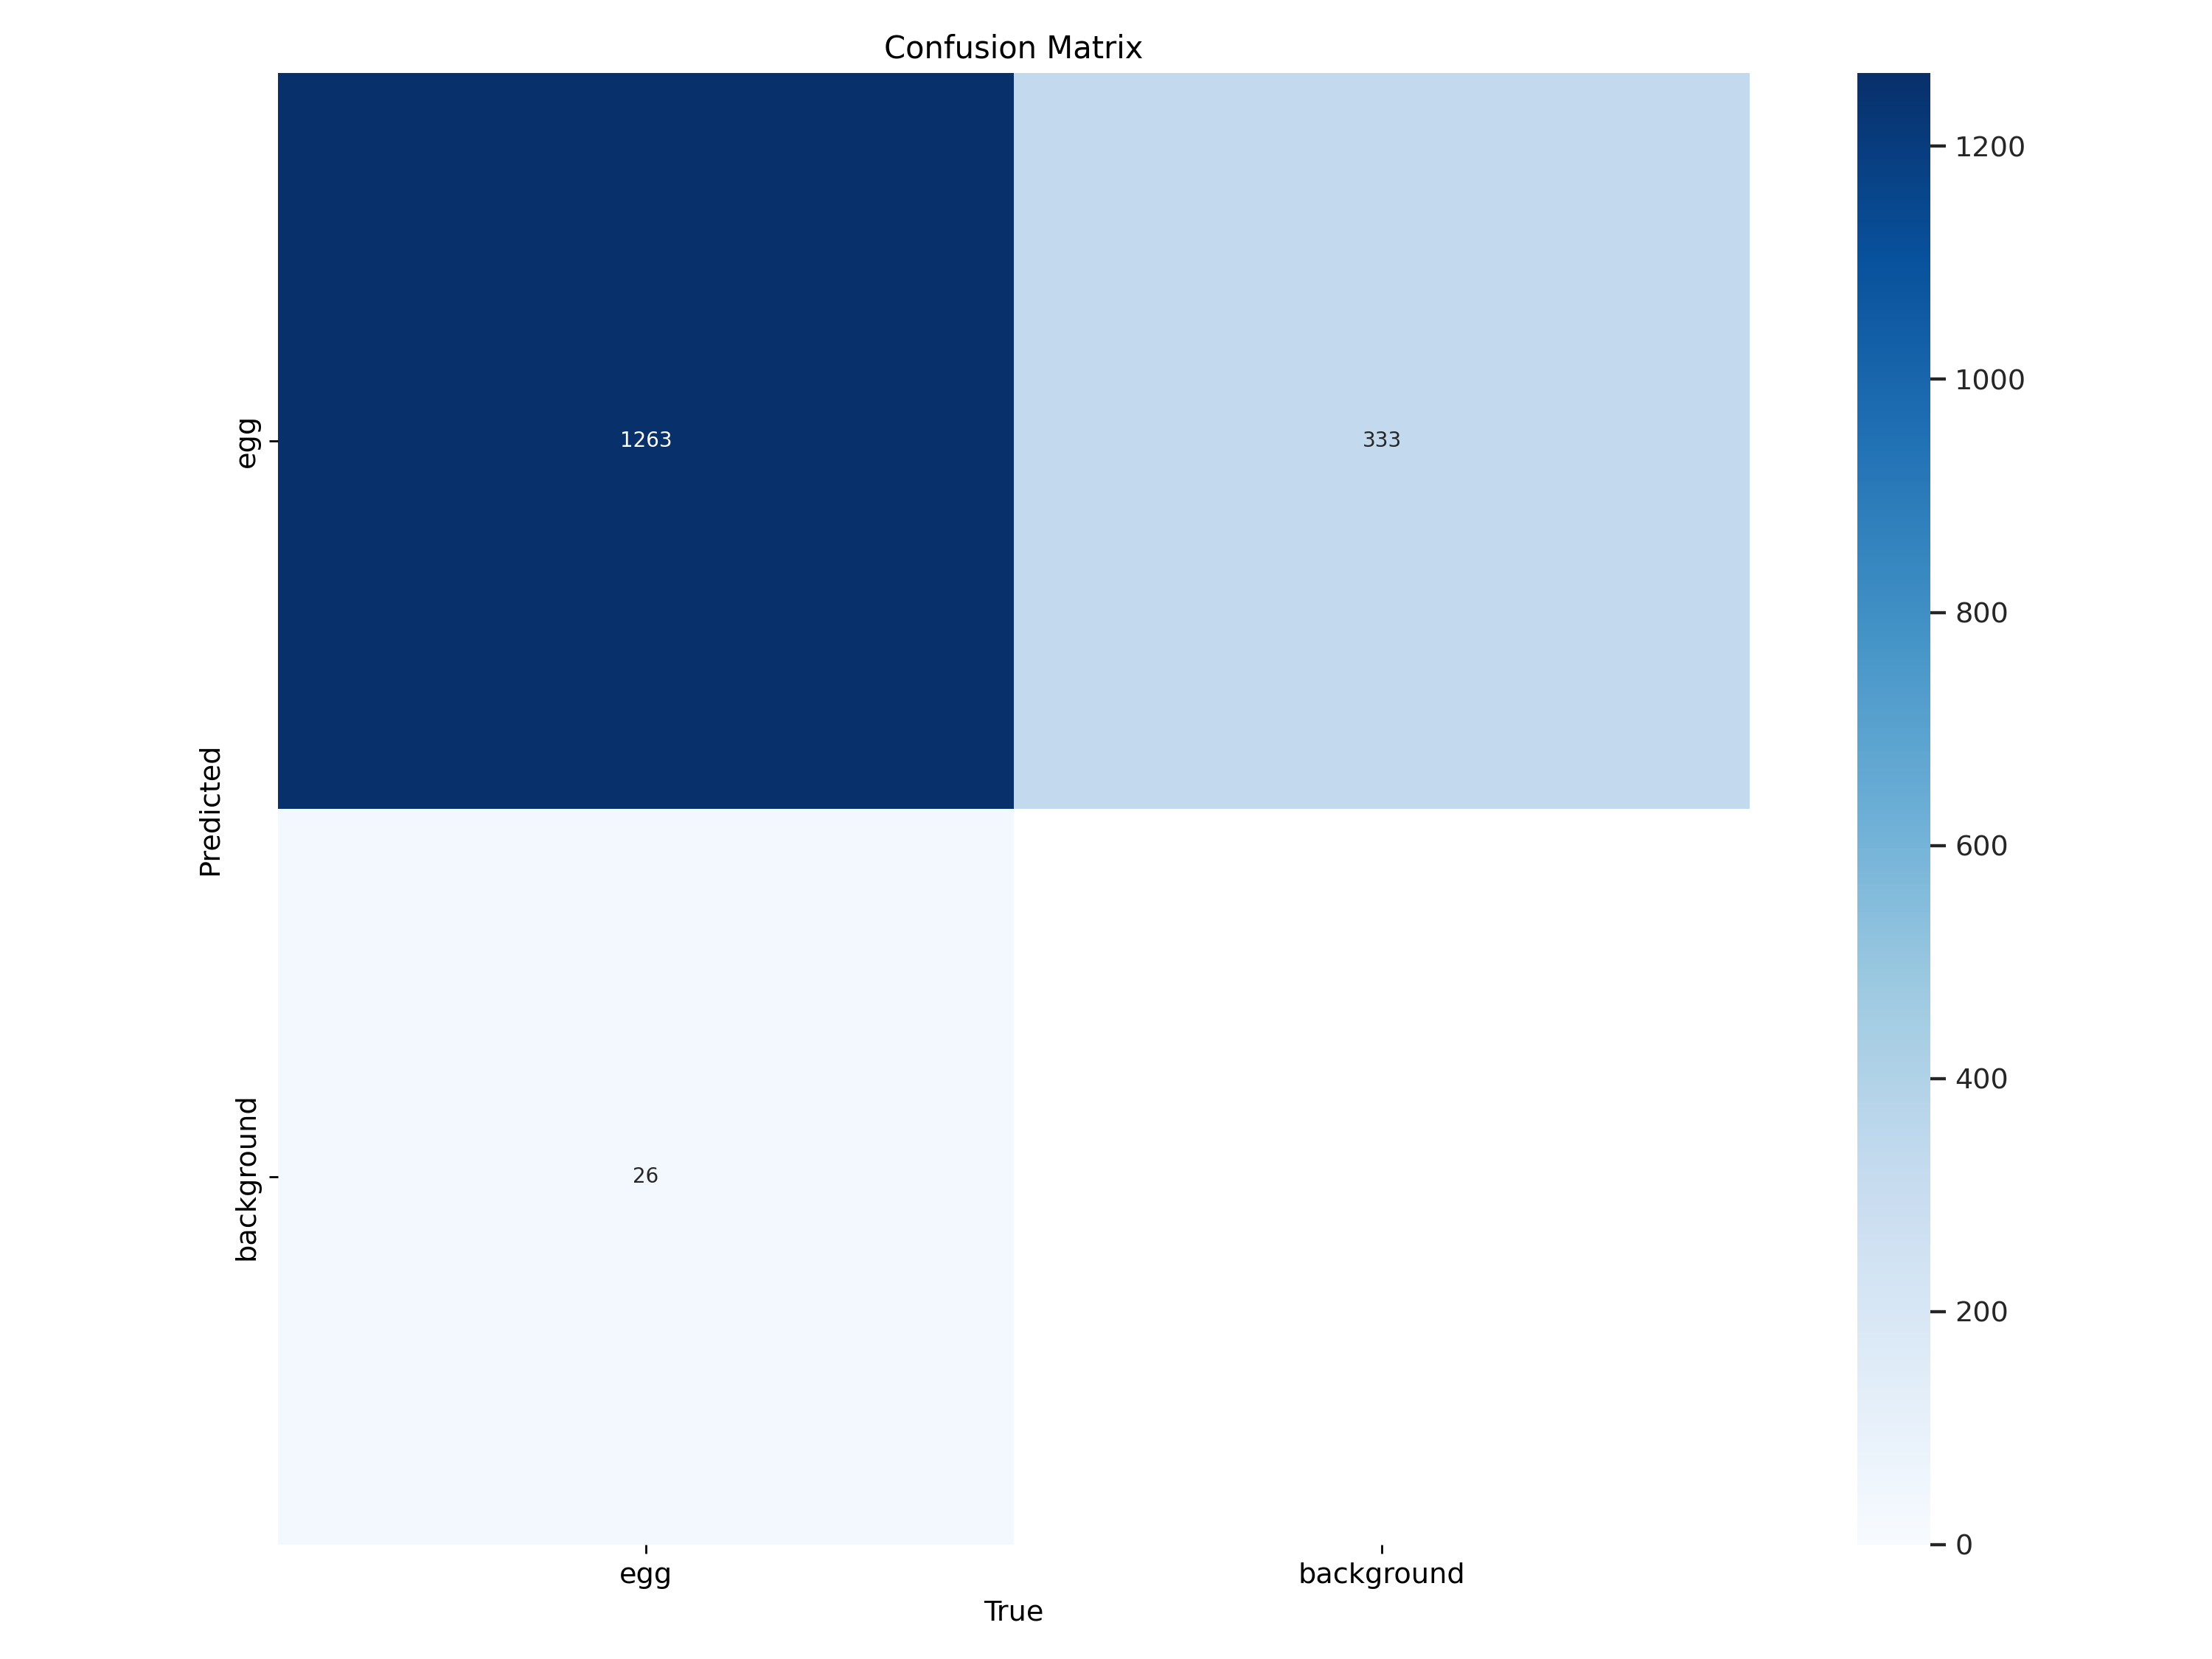

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/confusion_matrix.png', width=600)